In [3]:
import pandas as pd

In [5]:
housing = pd.read_csv('C:/Users/Jooeun Kim/Desktop/ML/handson-ml2-master/datasets/housing/housing.csv')

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


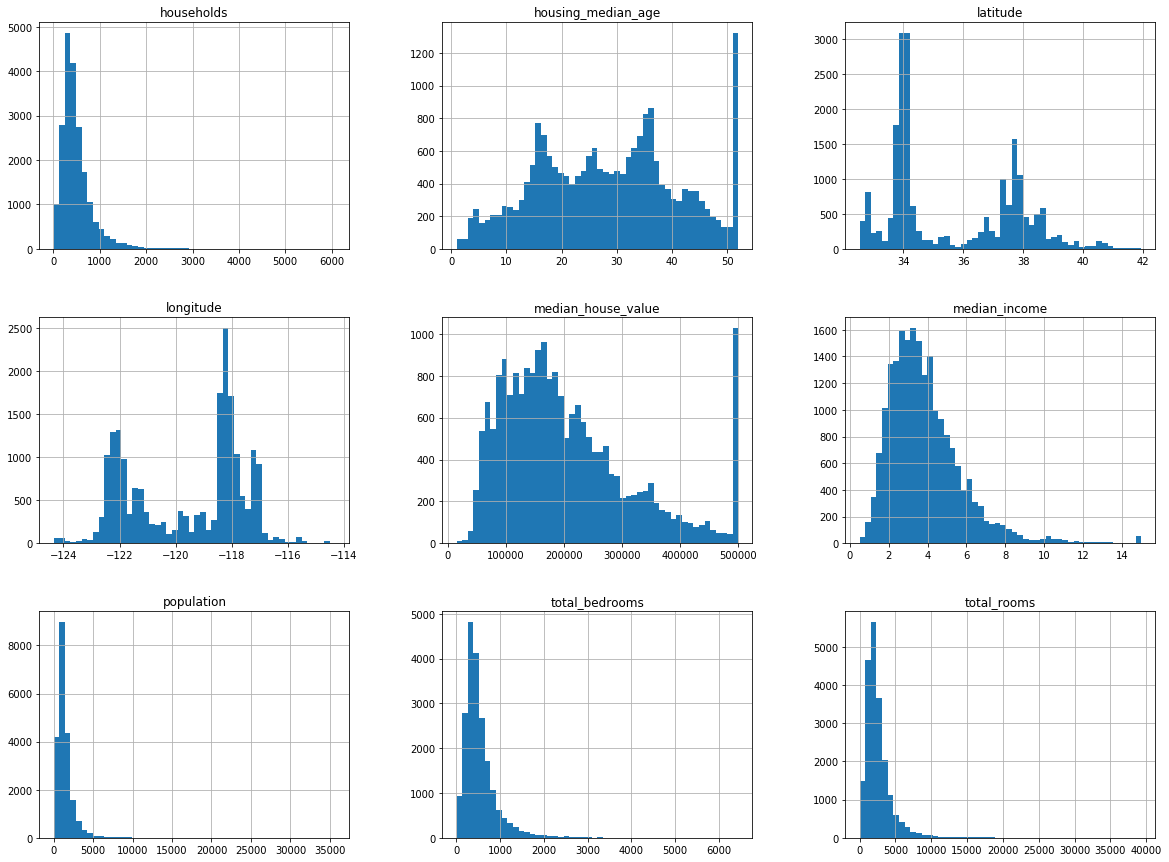

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
import numpy as np
import sklearn
assert sklearn.__version__ >= "0.20"

In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=24)

In [29]:
len(train_set), len(test_set)

(16512, 4128)

In [51]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [53]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [54]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [56]:
len(train_set), len(test_set)

(16362, 4278)

In [57]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')
len(train_set), len(test_set)

(16267, 4373)

In [58]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

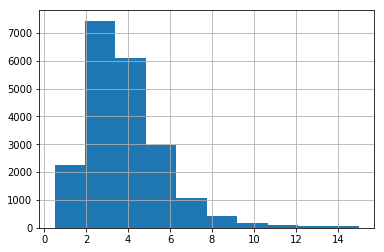

In [59]:
housing['median_income'].hist()

In [62]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0,1.5,3,4.5,6,np.inf],
                              labels=[1,2,3,4,5])
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

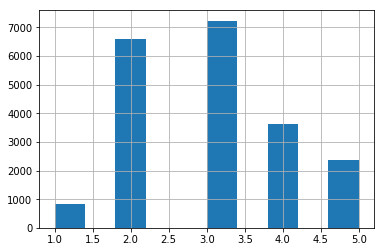

In [63]:
housing['income_cat'].hist()

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=24)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [70]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set), housing['income_cat'].value_counts() / len(housing)

(3    0.350533
 2    0.318798
 4    0.176357
 5    0.114583
 1    0.039729
 Name: income_cat, dtype: float64,
 3    0.350581
 2    0.318847
 4    0.176308
 5    0.114438
 1    0.039826
 Name: income_cat, dtype: float64)

In [77]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=24)
compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(test_set)
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props['Random']/compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified']/compare_props['Overall'] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.042878,7.664234,-0.243309
2,0.318847,0.318798,0.315407,-1.078863,-0.015195
3,0.350581,0.350533,0.352955,0.677170,-0.013820
4,0.176308,0.176357,0.178779,1.401484,0.027480
5,0.114438,0.114583,0.109981,-3.895004,0.127011


In [78]:
for sets in (strat_train_set, strat_test_set):
    sets.drop('income_cat', axis=1, inplace=True)

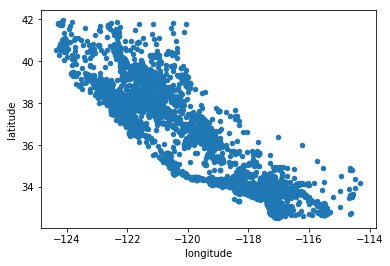

In [79]:
train = strat_train_set.copy()
train.plot(kind='scatter', x='longitude', y='latitude')

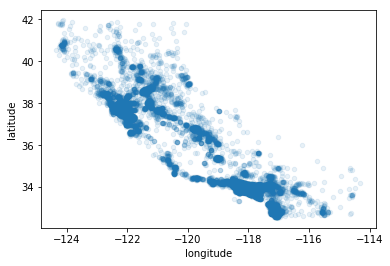

In [84]:
train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

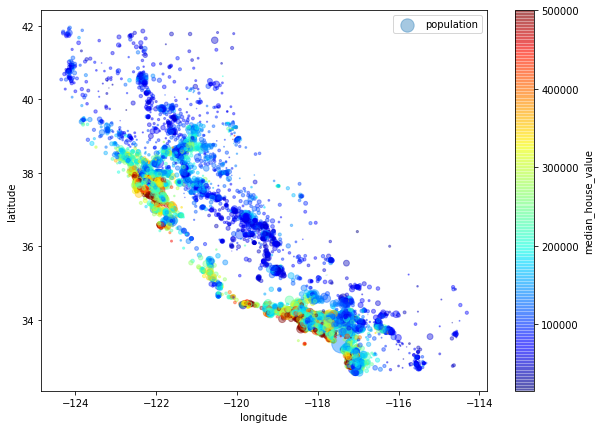

In [87]:
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
          s=train['population']/100, label='population', figsize=(10,7),
          c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
          sharex=False)
plt.legend()

In [88]:
corr_matrix = train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690034
total_rooms           0.136294
housing_median_age    0.101460
households            0.067978
total_bedrooms        0.052073
population           -0.019722
longitude            -0.044724
latitude             -0.144983
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002345D03BE10>,
      dtype=object)

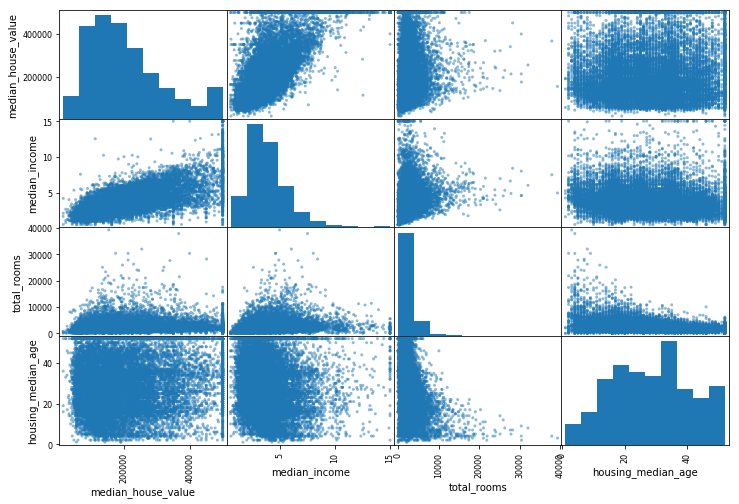

In [89]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms','housing_median_age']
scatter_matrix(train[attributes], figsize=(12,8))

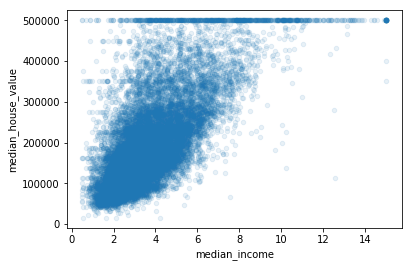

In [90]:
train.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [92]:
train['rooms_per_household'] = train['total_rooms']/train['households']
train['bedrooms_per_room'] = train['total_bedrooms']/train['total_rooms']
train['pop_per_household'] = train['population']/train['households']

In [93]:
corr_matrix = train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.690034
rooms_per_household    0.144218
total_rooms            0.136294
housing_median_age     0.101460
households             0.067978
total_bedrooms         0.052073
population            -0.019722
pop_per_household     -0.021874
longitude             -0.044724
latitude              -0.144983
bedrooms_per_room     -0.255067
Name: median_house_value, dtype: float64

In [94]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [95]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18177,-122.00,37.36,17.0,2070.0,NaN,797.0,275.0,8.6155,<1H OCEAN
5216,-118.25,33.94,43.0,793.0,NaN,736.0,231.0,0.8527,<1H OCEAN
4743,-118.36,34.05,42.0,1372.0,NaN,674.0,271.0,2.8793,<1H OCEAN
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY
5678,-118.30,33.72,35.0,2790.0,NaN,1167.0,441.0,6.2028,NEAR OCEAN


In [98]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                         index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
18177,-122.00,37.36,17.0,2070.0,436.0,797.0,275.0,8.6155
5216,-118.25,33.94,43.0,793.0,436.0,736.0,231.0,0.8527
4743,-118.36,34.05,42.0,1372.0,436.0,674.0,271.0,2.8793
696,-122.10,37.69,41.0,746.0,436.0,387.0,161.0,3.9063
5678,-118.30,33.72,35.0,2790.0,436.0,1167.0,441.0,6.2028


In [99]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6562,-118.13,34.20,45.0,1213.0,206.0,529.0,231.0,5.6629
6157,-117.96,34.08,39.0,1076.0,338.0,1242.0,332.0,2.2679
18969,-122.02,38.26,20.0,3899.0,763.0,2198.0,779.0,3.2061
19352,-122.95,38.73,37.0,1548.0,328.0,863.0,287.0,2.9792
3729,-118.42,34.18,40.0,1013.0,150.0,449.0,166.0,5.7143


In [100]:
housing_cat = housing[['ocean_proximity']]

In [103]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5], ordinal_encoder.categories_

(array([[1.],
        [0.],
        [1.],
        [0.],
        [0.]]),
 [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
        dtype=object)])

In [107]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot, cat_encoder.categories_

(array([[0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]),
 [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
        dtype=object)])

In [115]:
housing_cat_1hot[[]]

array([[0., 1., 0., 0., 0.]])

In [117]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [118]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+['rooms_per_household','population_per_household'],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
6562,-118.13,34.2,45,1213,206,529,231,5.6629,INLAND,5.25108,2.29004
6157,-117.96,34.08,39,1076,338,1242,332,2.2679,<1H OCEAN,3.24096,3.74096
18969,-122.02,38.26,20,3899,763,2198,779,3.2061,INLAND,5.00513,2.82157
19352,-122.95,38.73,37,1548,328,863,287,2.9792,<1H OCEAN,5.39373,3.00697
3729,-118.42,34.18,40,1013,150,449,166,5.7143,<1H OCEAN,6.10241,2.70482


In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 7.17524653e-01, -6.69453982e-01,  1.29902192e+00, ...,
        -7.27598021e-02, -6.96870542e-02, -6.65567609e-01],
       [ 8.02470142e-01, -7.25650192e-01,  8.23350531e-01, ...,
        -8.41479327e-01,  5.55664120e-02,  1.51291261e+00],
       [-1.22622800e+00,  1.23185115e+00, -6.82942201e-01, ...,
        -1.66816260e-01, -2.38023399e-02, -2.75095582e-01],
       ...,
       [-7.16555072e-01,  9.50870098e-01,  1.14046479e+00, ...,
         1.99108445e-01, -4.65137871e-02, -7.78679840e-01],
       [-9.81385125e-01,  5.71545675e-01, -4.45106506e-01, ...,
        -1.07685923e-01, -2.04658966e-02,  2.90599828e-02],
       [ 6.32579164e-01, -6.83503034e-01,  6.64793401e-01, ...,
        -8.75060335e-01, -1.39921844e-03,  1.73098833e+00]])

In [123]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.71752465, -0.66945398,  1.29902192, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80247014, -0.72565019,  0.82335053, ...,  0.        ,
         0.        ,  0.        ],
       [-1.226228  ,  1.23185115, -0.6829422 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.71655507,  0.9508701 ,  1.14046479, ...,  0.        ,
         0.        ,  0.        ],
       [-0.98138513,  0.57154567, -0.44510651, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63257916, -0.68350303,  0.6647934 , ...,  0.        ,
         0.        ,  0.        ]])

In [125]:
housing_prepared.shape, housing_num_tr.shape

((16512, 16), (16512, 11))

In [126]:
from sklearn.base import BaseEstimator, TransformerMixin

class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [127]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

old_num_pipeline= Pipeline([
    ('selector', OldDataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

old_cat_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [128]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', old_num_pipeline),
    ('cat_pipeline', old_cat_pipeline),
])

In [129]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
np.allclose(housing_prepared, old_housing_prepared)

True

In [130]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('predictions:',lin_reg.predict(some_data_prepared),'\nlabels:',list(some_labels))

predictions: [260182.24907835 157196.52124355 144934.69793741 199364.10789609
 297172.04147317] 
labels: [234000.0, 151800.0, 120400.0, 151300.0, 382400.0]


In [136]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68192.16799207576

In [137]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49221.13137062941

In [138]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=24)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=24, splitter='best')

In [139]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [140]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
### cross validation 함수가 scoring 기준이 클 수록 좋은 방향으로 loss를 기준하기때문에 negative mse를 써줘야한다
### mse 스코어를 음수로 계산해줬기 때문에 다시 mse를 알려면 앞에 -기호를 붙여줘야한다
tree_rmse_scores = np.sqrt(-scores)

In [141]:
def display_scores(scores):
    print('scores:',scores)
    print('mean:', scores.mean())
    print('standard deviation:', scores.std())
    
display_scores(tree_rmse_scores)

scores: [69744.58392916 68536.93153552 69899.89722985 71363.32397581
 70896.3232026  71940.82406542 75566.03250625 72460.96589022
 72560.61046527 70545.12486232]
mean: 71351.46176624193
standard deviation: 1851.246657060943


In [142]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores: [72219.48383252 66780.11996932 69083.38410095 66844.04667948
 66598.85941543 67639.82864788 71878.42475446 65972.56667514
 69353.39237786 69470.85167133]
mean: 68584.0958124377
standard deviation: 2088.80538780875


In [144]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=24)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=24, verbose=0, warm_start=False)

In [145]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18527.03989444534

In [146]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [51117.36404352 47359.91587583 46242.75220007 49161.76659773
 48115.70193733 51300.93817205 53349.30762415 48165.27540286
 50561.6773958  50461.35132221]
mean: 49583.60505715302
standard deviation: 2041.0699923189748


In [147]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110663.78016578968

In [150]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, params_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [151]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [152]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [153]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63914.540699581405 {'max_features': 2, 'n_estimators': 3}
54894.22686364163 {'max_features': 2, 'n_estimators': 10}
52637.423704681925 {'max_features': 2, 'n_estimators': 30}
58754.77057851837 {'max_features': 4, 'n_estimators': 3}
51706.62895592058 {'max_features': 4, 'n_estimators': 10}
49973.4080700409 {'max_features': 4, 'n_estimators': 30}
58645.49349544185 {'max_features': 6, 'n_estimators': 3}
51628.31776120622 {'max_features': 6, 'n_estimators': 10}
49805.070760730785 {'max_features': 6, 'n_estimators': 30}
58805.4880235464 {'max_features': 8, 'n_estimators': 3}
51838.60862554152 {'max_features': 8, 'n_estimators': 10}
49825.118005040786 {'max_features': 8, 'n_estimators': 30}
62467.42117845599 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53931.50300154211 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58118.24153607417 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51788.766652650884 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [154]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072213,0.014783,0.003391,0.000489,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.899478e+09,-4.232517e+09,...,-4.085069e+09,1.093772e+08,18,-1.160467e+09,-1.171997e+09,-1.099809e+09,-1.098328e+09,-1.064264e+09,-1.118973e+09,4.079195e+07
1,0.303787,0.106256,0.010573,0.000798,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.891460e+09,-2.964838e+09,...,-3.013376e+09,7.570039e+07,11,-5.625111e+08,-5.973914e+08,-5.903664e+08,-5.702605e+08,-5.583782e+08,-5.757815e+08,1.542184e+07
2,0.729042,0.039633,0.029329,0.002863,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.635929e+09,-2.669802e+09,...,-2.770698e+09,1.012434e+08,9,-4.195180e+08,-4.471094e+08,-4.293731e+08,-4.213733e+08,-4.143104e+08,-4.263368e+08,1.145852e+07
3,0.114501,0.009081,0.004382,0.000494,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.564921e+09,-3.155175e+09,...,-3.452123e+09,1.870249e+08,15,-9.844019e+08,-9.540495e+08,-9.261651e+08,-9.181177e+08,-9.013551e+08,-9.368179e+08,2.926415e+07
4,0.377191,0.014416,0.010974,0.001671,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.668402e+09,-2.437823e+09,...,-2.673575e+09,1.351724e+08,6,-5.209680e+08,-5.113508e+08,-5.123016e+08,-5.109736e+08,-5.086490e+08,-5.128486e+08,4.233654e+06
5,1.167278,0.111017,0.030121,0.001596,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.429539e+09,-2.306069e+09,...,-2.497342e+09,1.252885e+08,3,-3.859070e+08,-3.912237e+08,-3.830373e+08,-3.826219e+08,-3.738109e+08,-3.833202e+08,5.659535e+06
6,0.146806,0.006598,0.003990,0.000630,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.320227e+09,-3.267441e+09,...,-3.439294e+09,1.296006e+08,14,-9.475034e+08,-9.271952e+08,-9.159330e+08,-8.747320e+08,-9.024584e+08,-9.135644e+08,2.439082e+07
7,0.491085,0.026247,0.009775,0.000746,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.624243e+09,-2.449475e+09,...,-2.665483e+09,1.252746e+08,5,-4.908084e+08,-4.937601e+08,-4.930985e+08,-5.123286e+08,-5.009103e+08,-4.981812e+08,7.840106e+06
8,1.501185,0.034210,0.026930,0.000631,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.397059e+09,-2.227172e+09,...,-2.480545e+09,1.498804e+08,1,-3.809531e+08,-3.792748e+08,-3.796733e+08,-3.722722e+08,-3.704162e+08,-3.765179e+08,4.300808e+06
9,0.195277,0.009301,0.003990,0.000892,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.359511e+09,-3.468557e+09,...,-3.458085e+09,6.373863e+07,16,-8.819192e+08,-9.130454e+08,-8.837277e+08,-8.783525e+08,-8.746744e+08,-8.863438e+08,1.370717e+07


In [156]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=24)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=24)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=24, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002345EFDDDD8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002345EFDD630>},
          pre_dispatch='2*n_jobs', random_state=24, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [158]:
rnd_search.best_params_

{'max_features': 4, 'n_estimators': 83}

In [159]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49705.477383878264 {'max_features': 3, 'n_estimators': 132}
54149.18328729826 {'max_features': 1, 'n_estimators': 88}
51369.60758454125 {'max_features': 2, 'n_estimators': 146}
51516.017748542516 {'max_features': 2, 'n_estimators': 101}
54926.768373546234 {'max_features': 4, 'n_estimators': 5}
49107.71908969799 {'max_features': 4, 'n_estimators': 83}
49120.14568581312 {'max_features': 4, 'n_estimators': 124}
49133.25175759974 {'max_features': 4, 'n_estimators': 116}
53231.32187494911 {'max_features': 2, 'n_estimators': 19}
51275.10667724948 {'max_features': 2, 'n_estimators': 164}


In [160]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32380985563375847, 'median_income'),
 (0.14882845053513588, 'INLAND'),
 (0.11101165113741582, 'pop_per_hhold'),
 (0.09667275290400694, 'bedrooms_per_room'),
 (0.07384708526387436, 'longitude'),
 (0.07337624328484058, 'latitude'),
 (0.04773812690762622, 'rooms_per_hhold'),
 (0.04266112748598137, 'housing_median_age'),
 (0.016622758965900195, 'population'),
 (0.016394968923890425, 'total_rooms'),
 (0.01606443708362255, 'households'),
 (0.015653110585669358, 'total_bedrooms'),
 (0.009905608309802787, '<1H OCEAN'),
 (0.004212949857712512, 'NEAR OCEAN'),
 (0.0029865435411232503, 'NEAR BAY'),
 (0.00021432957963927327, 'ISLAND')]

In [ ]:
import seaborn as sns
sns.barplot(feature_importances)

In [161]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48654.4298345271

In [162]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46453.25584219, 50760.24139724])

###1

In [165]:
params_grid = [
    {'kernel': ['linear'], 'C':[1,10,100,500,1000,5000,10000]},
    {'kernel': ['rbf'], 'C':[1,10,100,500,1000,5000], 'gamma':[0.01,0.05,0.1,0.5,1,5,10]},
]
svm_regressor = SVR()
grid_search = GridSearchCV(svm_regressor, params_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

###2

In [ ]:
from random import uniform, randint

param_distribs = {
    'kernel': ['liner','rbf'],
    'C': randint(low=1, high=10000),
    'gamma': round(uniform(0.0, 5.0),1),
        
}
svm_regressor = SVR()
rnd_search = RandomizedSearchCV(svm_regressor, 
                                param_distributions=param_distribs, 
                                n_iters=10, cv=5,
                          scoring='neg_mean_squared_error',
                          random_state=24)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

###3

In [ ]:
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, n_attributes):
        self.feature_importances = feature_importances
        self.n_attr = n_attributes
    def fit(self, X, y=None):
        self.features = 
        return self
    def transform(self, X):
        return X[:, self.features]